<a href="https://colab.research.google.com/github/sebastiaanbv/NLP_EAN/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from transformers import AutoTokenizer

model_name = "classla/multilingual-IPTC-news-topic-classifier"
#model_name = "finiteautomata/beto-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name,num_labels=1)

In [91]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1, ignore_mismatched_sizes=True)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at classla/multilingual-IPTC-news-topic-classifier and are newly initialized because the shapes did not match:
- classifier.out_proj.bias: found shape torch.Size([17]) in the checkpoint and torch.Size([1]) in the model instantiated
- classifier.out_proj.weight: found shape torch.Size([17, 1024]) in the checkpoint and torch.Size([1, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [92]:
model.config

XLMRobertaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "classla/multilingual-IPTC-news-topic-classifier",
  "architectures": [
    "XLMRobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.46.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [93]:
import pandas as pd

Df=pd.read_excel("Noticias.xlsx")
Df.drop('Columna1', axis=1, inplace=True)
Df.head()

,Enlaces,Título,info,contenido,Etiqueta
0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


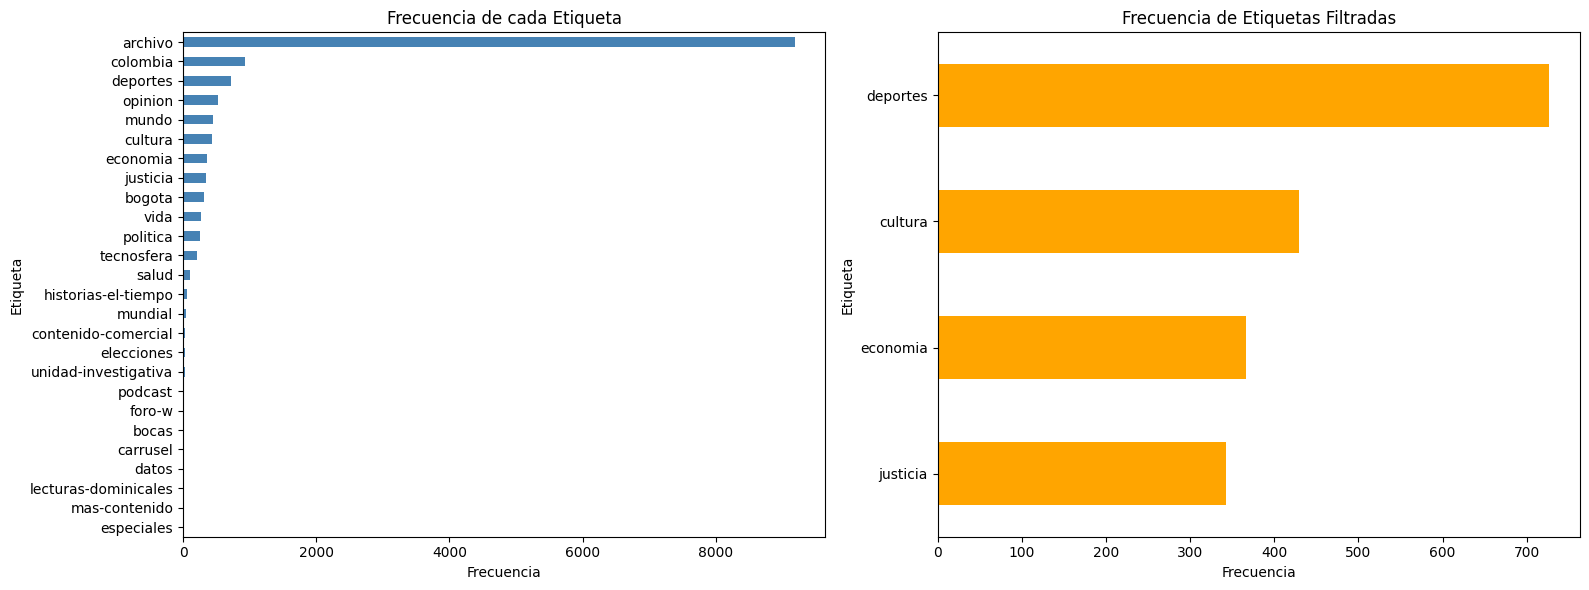

In [94]:
import matplotlib.pyplot as plt

# Calcular las frecuencias
frecuencia_etiquetas = Df['Etiqueta'].value_counts()

# Crear los subgráficos en una sola fila
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Graficar las frecuencias generales
frecuencia_etiquetas.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Frecuencia de cada Etiqueta')
axes[0].set_xlabel('Frecuencia')
axes[0].set_ylabel('Etiqueta')
axes[0].invert_yaxis()  # Invertir el eje Y

# Filtrar etiquetas
Df_filter = Df[Df['Etiqueta'].isin(["deportes", "cultura", "economia", "justicia"])]
frecuencia_etiquetas_filter = Df_filter['Etiqueta'].value_counts()

# Graficar las frecuencias filtradas
frecuencia_etiquetas_filter.plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('Frecuencia de Etiquetas Filtradas')
axes[1].set_xlabel('Frecuencia')
axes[1].set_ylabel('Etiqueta')
axes[1].invert_yaxis()  # Invertir el eje Y

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

In [95]:
#Eliminar contenido vacio
Df_filter = Df_filter.dropna(subset=['contenido'])

Df_filter

,Enlaces,Título,info,contenido,Etiqueta
10487,https://www.eltiempo.com/cultura/al-interior-d...,"Al interior de, aparte, roquero, rock / El len...",'Al interior de' es el reemplazo sofisticado e...,Citas: “Los crímenes de violencia sexual comet...,cultura
10488,https://www.eltiempo.com/cultura/arte-y-teatro...,Antonina Canal: 20 años de danza oriental en C...,La bailarina habló con EL TIEMPO de su trayect...,Con motivo de la celebración de los 20 años de...,cultura
10489,https://www.eltiempo.com/cultura/arte-y-teatro...,"Aparece en Holanda cuadro de Picasso, robado h...","La pintura era propiedad de un jeque saudí, Ab...","El cuadro Busto de mujer, del artista español ...",cultura
10490,https://www.eltiempo.com/cultura/arte-y-teatro...,Así será la programación del Carnaval de las A...,El evento con algunos de los artistas más repr...,"El Carnaval de las Artes, organizado en Barran...",cultura
10491,https://www.eltiempo.com/cultura/arte-y-teatro...,‘Fragmentos’ se viste de charlas y música,El lugar donde está el monumento de la artista...,"Louise du Toit, filósofa; el doctor Denis Mukw...",cultura
...,...,...,...,...,...
12467,https://www.eltiempo.com/justicia/servicios/po...,Más de 70 mil policías apoyan jornada de aisla...,Miisterio de Defensa activó dispositivo especi...,"El ministro de la Defensa, Carlos Holmes Truj...",justicia
12468,https://www.eltiempo.com/justicia/servicios/pr...,Habrá proyecto conjunto para superar la crisis...,Se revisarán “conductas antisociales” que se h...,Después de varios contrapunteos sobre la mejor...,justicia
12469,https://www.eltiempo.com/justicia/servicios/qu...,¿Qué hacer en caso de un accidente de tránsito...,EL TIEMPO y la Unilibre responden a esta y otr...,El TIempo y la Universidad Libre se aliaron pa...,justicia
12470,https://www.eltiempo.com/justicia/servicios/su...,Otorgan subsidios a tres obreros del edificio ...,También la esposa de una de las víctimas recib...,Tres trabajadores del edificio Portales Blas d...,justicia


Etiqueta
deportes    727
cultura     727
economia    727
justicia    727
Name: count, dtype: int64


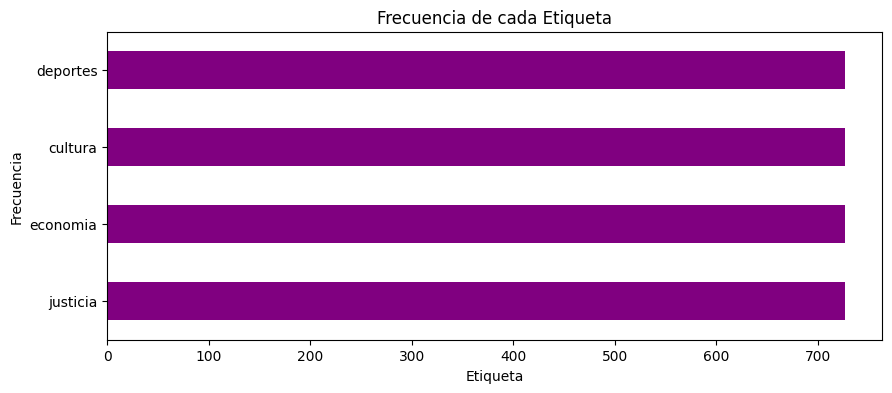

In [96]:
from sklearn.utils import resample

# Separar las clases
deportes = Df_filter[Df_filter['Etiqueta'] == 'deportes']
cultura = Df_filter[Df_filter['Etiqueta'] == 'cultura']
economia = Df_filter[Df_filter['Etiqueta'] == 'economia']
justicia = Df_filter[Df_filter['Etiqueta'] == 'justicia']

# Sobremuestreo de las clases menores
cultura_upsampled = resample(cultura, replace=True, n_samples=len(deportes), random_state=42)
economia_upsampled = resample(economia, replace=True, n_samples=len(deportes), random_state=42)
justicia_upsampled = resample(justicia, replace=True, n_samples=len(deportes), random_state=42)

# Unir los datasets
Df_pre = pd.concat([deportes, cultura_upsampled, economia_upsampled, justicia_upsampled])

#Graficar frecuencia
frecuencia_etiquetas = Df_pre['Etiqueta'].value_counts()

# Verificar el balance
print(Df_pre['Etiqueta'].value_counts())
plt.figure(figsize=(10, 4))
frecuencia_etiquetas.plot(kind='barh', color='purple')
plt.title('Frecuencia de cada Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.gca().invert_yaxis()
plt.show()

In [97]:
from transformers import pipeline

# Define el modelo y el tokenizer
model_name = "classla/multilingual-IPTC-news-topic-classifier"
classifier = pipeline("text-classification", model=model_name, device=0)  # Usa GPU si está disponible

# Mapea las etiquetas originales a tus categorías deseadas
labels_map = {
    "arts, culture, entertainment and media": "cultura",
    "sport": "deportes",
    "economy, business and finance": "economia",
    "crime, law and justice": "justicia"
}

# Clasifica los textos
texts = ["Un nuevo festival cultural se llevará a cabo en la ciudad",
         "El equipo ganó el campeonato de fútbol",
         "El mercado de valores cerró con pérdidas",
         "El juez dictó sentencia en un caso de corrupción"]

results = [classifier(text)[0] for text in texts]

# Filtra y traduce las etiquetas
translated_results = [
    {
        "texto": text,
        "categoria": labels_map.get(result["label"], "otra"),
        "confianza": result["score"]
    }
    for text, result in zip(texts, results)
    if result["label"] in labels_map
]

# Muestra los resultados
for res in translated_results:
    print(f"Texto: {res['texto']}")
    print(f"Categoría: {res['categoria']}, Confianza: {res['confianza']:.2f}")




Texto: Un nuevo festival cultural se llevará a cabo en la ciudad
Categoría: cultura, Confianza: 1.00
Texto: El equipo ganó el campeonato de fútbol
Categoría: deportes, Confianza: 1.00
Texto: El mercado de valores cerró con pérdidas
Categoría: economia, Confianza: 1.00
Texto: El juez dictó sentencia en un caso de corrupción
Categoría: justicia, Confianza: 0.99


In [117]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Define el modelo, el tokenizador y la clasificación
model_name = "classla/multilingual-IPTC-news-topic-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline("text-classification", model=model_name, tokenizer=tokenizer, device=0)

# Mapa de etiquetas a las 4 categorías deseadas
labels_map = {
    "arts, culture, entertainment and media": "cultura",
    "sport": "deportes",
    "economy, business and finance": "economia",
    "crime, law and justice": "justicia"
}

def truncate_text(text, max_length=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length)
    return tokenizer.decode(tokens, skip_special_tokens=True)

def classify_text_forced(text):
    truncated_text = truncate_text(text)
    # Obtener TODAS las categorías (17) en orden de mayor a menor score
    all_results = classifier(truncated_text, top_k=17)

    # Filtrar solo las categorías permitidas
    filtered_results = [res for res in all_results if res["label"] in labels_map]

    if filtered_results:
        # Elegir la categoría permitida con mayor score
        top_result = max(filtered_results, key=lambda x: x["score"])
        label = labels_map[top_result["label"]]
        score = top_result["score"]
    else:
        # Si, excepcionalmente, no aparece ninguna de las 4 permitidas (muy raro),
        # podrías forzar la selección de la categoría permitida con el menor score,
        # o asignar una por defecto.
        # Pero dado el requerimiento, forzaremos siempre una de las cuatro.
        # Tomamos la etiqueta con el mayor score entre las 4, aunque no esté presente.
        # Esto requeriría obtener las probabilidades completas del modelo.
        # Como esto es muy improbable, puedes elegir una por defecto:
        label = "No encontro categoría"
        score = 0.0

    return label, score

# Supongamos que Df_pre es tu DataFrame con la columna 'contenido'
data = Df_pre['contenido']
Df_final = pd.DataFrame(data, columns=["contenido"])

Df_final[["categoria", "confianza"]] = Df_final["contenido"].apply(lambda x: pd.Series(classify_text_forced(x)))

print(Df_final)




                                               contenido categoria  confianza
10924  La organización del Grand Premio de Canadá de ...  deportes   0.997304
10925  Llevar el apellido Schumacher es sinónimo de g...  deportes   0.989931
10926  Fernando Alonso, acompañado por el suizo Sébas...  deportes   0.998461
10927  El británico Lewis Hamilton logró este domingo...  deportes   0.998430
10928  La Fórmula 1 realizará una competición virtual...  deportes   0.998229
...                                                  ...       ...        ...
12387  Más de la mitad de la plata disponible para in...  economia   0.998454
12434  La Fiscalía imputó este martes cargos al secre...  justicia   0.996688
12396  Desde hace años Corea del Sur ha donado a Colo...  justicia   0.001004
12182  En el video de 32 minutos grabado por algunos ...   cultura   0.000698
12364  De manera pacífica, decenas de exalumnos del c...  justicia   0.997251

[2908 rows x 3 columns]


In [129]:
# hacer un recuento de las etiquetas predichas por categoria
Df_final['categoria'].value_counts()


,count
categoria,
justicia,809
deportes,725
economia,720
cultura,654


In [123]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Crea arrays con las etiquetas reales y predichas
y_true = Df_pre['Etiqueta']
y_pred = Df_final['categoria']

# Calcula la exactitud (accuracy)
acc = accuracy_score(y_true, y_pred)
print("Exactitud (Accuracy):", acc)

# Calcula la precisión macro
prec = precision_score(y_true, y_pred, average='macro')
print("Precisión (Macro):", prec)

# Calcula la exhaustividad (Recall) macro
rec = recall_score(y_true, y_pred, average='macro')
print("Exhaustividad (Recall, Macro):", rec)

# Calcula el F1-score macro
f1 = f1_score(y_true, y_pred, average='macro')
print("F1-score (Macro):", f1)

print("---------------------------------------------------------")
# Genera un reporte de clasificación completo
report = classification_report(y_true, y_pred)
print("Reporte de Clasificación:")
print(report)


Exactitud (Accuracy): 0.9133425034387895
Precisión (Macro): 0.9162142819295267
Exhaustividad (Recall, Macro): 0.9133425034387896
F1-score (Macro): 0.9135061734340162
---------------------------------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

     cultura       0.95      0.85      0.90       727
    deportes       0.94      0.94      0.94       727
    economia       0.93      0.92      0.92       727
    justicia       0.85      0.94      0.89       727

    accuracy                           0.91      2908
   macro avg       0.92      0.91      0.91      2908
weighted avg       0.92      0.91      0.91      2908



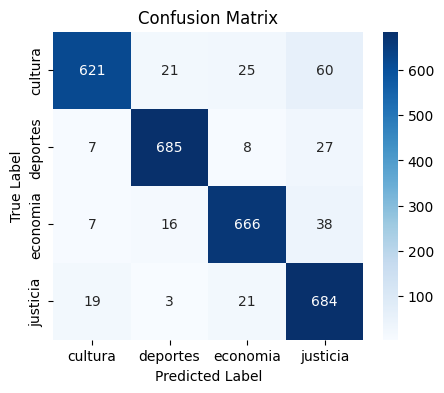

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Suponiendo que ya tienes y_true, y_pred definidos
conf_matrix = confusion_matrix(y_true, y_pred)

# Suponiendo que ya tienes y_true, y_pred y conoces las clases
class_names = ['cultura', 'deportes', 'economia', 'justicia']

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [128]:
print("Confusion Matrix (array):")
print(conf_matrix)


Confusion Matrix (array):
[[621  21  25  60]
 [  7 685   8  27]
 [  7  16 666  38]
 [ 19   3  21 684]]


In [ ]:
"""
import pandas as pd
from transformers import pipeline

# Define el modelo y el tokenizer
model_name = "classla/multilingual-IPTC-news-topic-classifier"
classifier = pipeline("text-classification", model=model_name, device=0)  # Usa GPU si está disponible

# Mapea las etiquetas originales a tus categorías deseadas
labels_map = {
    "arts, culture, entertainment and media": "cultura",
    "sport": "deportes",
    "economy, business and finance": "economia",
    "crime, law and justice": "justicia"
}

# Crea un DataFrame de ejemplo a partir de Df_pre['contenido']
data = Df_pre['contenido']
df = pd.DataFrame(data, columns=["contenido"])

# Define una función para truncar textos largos
def truncate_text(text, max_length=512):
    return text[:max_length]

# Clasifica solo los primeros 10 textos
def classify_text(text):
    truncated_text = truncate_text(text)  # Trunca el texto
    result = classifier(truncated_text)[0]
    label = labels_map.get(result["label"], "otra")
    score = result["score"]
    return label, score

# Aplica la clasificación solo a las primeras 10 filas
df_first_10 = df.head(50).copy()
df_first_10[["categoria", "confianza"]] = df_first_10["contenido"].apply(lambda x: pd.Series(classify_text(x)))

# Muestra el DataFrame clasificado
print(df_first_10)
"""

